# TD2: Deep learning

In this TD, you must modify this notebook to answer the questions. To do this,

1. Fork this repository
2. Clone your forked repository on your local computer
3. Answer the questions
4. Commit and push regularly

The last commit is due on Sunday, December 1, 11:59 PM. Later commits will not be taken into account.

Install and test PyTorch from  https://pytorch.org/get-started/locally.

In [1]:
%pip install torch torchvision

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d6/a8/43e5033f9b2f727c158456e0720f870030ad3685c46f41ca3ca901b54922/torch-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/13/24/23cdf7e7dc33e5c01588c315f8424d31afa9edb05a80168f3d44f7178ff7/torchvision-0.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/81/54/84d42a0bee35edba99dee7b59a8d4970eccdd44b99fe728ed912106fc781/filelock-3.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/24/21/7d397a4b7934ff4028987914ac1044d3b7d52712f30e2ac7a2ae5bc86dd0/typing_extensions-4.8.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
      --------------------------------------- 0.1/5.7 MB 4.0 MB/s eta 0:00:02
     ----


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\arman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
%pip install pytorch torchvision cudatoolkit=10.1 -c pytorch

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'pytorch'

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\arman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



To test run the following code

In [3]:
import torch

N, D = 14, 10
x = torch.randn(N, D).type(torch.FloatTensor)
print(x)

from torchvision import models

alexnet = models.alexnet()
print(alexnet)

tensor([[ 0.2555,  0.5142,  0.9050,  0.6887, -3.4806, -0.2438, -0.9182,  0.3653,
         -0.9298, -0.1004],
        [ 0.1015,  0.1290,  0.3338, -1.4685, -0.9104, -0.5621,  1.2732, -0.6638,
          0.1203,  1.1361],
        [-1.1418, -0.1904, -0.1097,  0.8402,  0.1132,  1.6985, -1.9142,  0.5754,
         -0.2390,  0.3977],
        [ 1.4522, -1.0028, -1.3353,  0.5364, -1.8395,  1.3521,  0.0924, -0.8649,
         -0.1557,  0.2052],
        [ 0.8001, -0.5585,  0.8460, -0.9609, -1.1242,  1.5402, -2.4606, -2.0300,
         -0.6318, -0.0838],
        [ 0.2683, -0.2505, -0.1922,  0.9091,  0.2451,  0.1776, -1.0072, -2.0003,
          1.0307,  2.2512],
        [-1.2950,  0.6823,  0.6947,  0.4725, -0.1428,  1.4061,  0.5532,  1.2814,
          0.8082,  0.8662],
        [-1.3510,  0.2161,  0.0375,  1.0638,  0.2757,  0.1830,  0.8016,  0.9672,
         -0.8459, -0.3823],
        [-1.1632,  0.0980,  0.9728, -0.6465, -1.6451,  1.2031,  0.8534,  0.8798,
         -0.0494,  2.5921],
        [-0.5641, -

## Exercise 1: CNN on CIFAR10

The goal is to apply a Convolutional Neural Net (CNN) model on the CIFAR10 image dataset and test the accuracy of the model on the basis of image classification. Compare the Accuracy VS the neural network implemented during TD1.

Have a look at the following documentation to be familiar with PyTorch.

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

You can test if GPU is available on your machine and thus train on it to speed up the process

In [4]:
import torch

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print("CUDA is not available.  Training on CPU ...")
else:
    print("CUDA is available!  Training on GPU ...")

CUDA is not available.  Training on CPU ...


Next we load the CIFAR10 dataset

In [5]:
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# choose the training and test datasets
train_data = datasets.CIFAR10("data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10("data", train=False, download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers
)
valid_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers
)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size, num_workers=num_workers
)

# specify the image classes
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

20.0%


KeyboardInterrupt: 

CNN definition (this one is an example)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# create a complete CNN
model = Net()
print(model)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Loss function and training using SGD (Stochastic Gradient Descent) optimizer

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # specify optimizer

n_epochs = 30  # number of epochs to train the model
train_loss_list = []  # list to store loss to visualize
valid_loss_min = np.Inf  # track change in validation loss

for epoch in range(n_epochs):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list.append(train_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min, valid_loss
            )
        )
        torch.save(model.state_dict(), "model_cifar.pt")
        valid_loss_min = valid_loss

Epoch: 0 	Training Loss: 43.789997 	Validation Loss: 38.465666
Validation loss decreased (inf --> 38.465666).  Saving model ...
Epoch: 1 	Training Loss: 35.233757 	Validation Loss: 33.333461
Validation loss decreased (38.465666 --> 33.333461).  Saving model ...
Epoch: 2 	Training Loss: 31.420901 	Validation Loss: 29.788399
Validation loss decreased (33.333461 --> 29.788399).  Saving model ...
Epoch: 3 	Training Loss: 28.943639 	Validation Loss: 28.194237
Validation loss decreased (29.788399 --> 28.194237).  Saving model ...
Epoch: 4 	Training Loss: 27.155546 	Validation Loss: 26.364088
Validation loss decreased (28.194237 --> 26.364088).  Saving model ...
Epoch: 5 	Training Loss: 25.796170 	Validation Loss: 26.289203
Validation loss decreased (26.364088 --> 26.289203).  Saving model ...
Epoch: 6 	Training Loss: 24.553256 	Validation Loss: 24.934050
Validation loss decreased (26.289203 --> 24.934050).  Saving model ...
Epoch: 7 	Training Loss: 23.561086 	Validation Loss: 23.690149
Valid

Does overfit occur? If so, do an early stopping.

In [9]:
%pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/16/a2/3a113a948eabeb2031f1ae3f196a0a32cd5707046176937bba52a5b1ef6d/fonttools-4.45.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/158.4 kB ? eta -:--:--
     ------- ------------------------------- 30.7/158.4 kB 1.3 MB/s 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\arman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import matplotlib.pyplot as plt

plt.plot(range(n_epochs), train_loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 1")
plt.show()

NameError: name 'n_epochs' is not defined

Now loading the model with the lowest validation loss value


In [11]:
model.load_state_dict(torch.load("./model_cifar.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 20.845967

Test Accuracy of airplane: 69% (695/1000)
Test Accuracy of automobile: 80% (806/1000)
Test Accuracy of  bird: 55% (559/1000)
Test Accuracy of   cat: 47% (471/1000)
Test Accuracy of  deer: 54% (543/1000)
Test Accuracy of   dog: 48% (484/1000)
Test Accuracy of  frog: 73% (737/1000)
Test Accuracy of horse: 69% (699/1000)
Test Accuracy of  ship: 80% (801/1000)
Test Accuracy of truck: 66% (665/1000)

Test Accuracy (Overall): 64% (6460/10000)


Build a new network with the following structure.

- It has 3 convolutional layers of kernel size 3 and padding of 1.
- The first convolutional layer must output 16 channels, the second 32 and the third 64.
- At each convolutional layer output, we apply a ReLU activation then a MaxPool with kernel size of 2.
- Then, three fully connected layers, the first two being followed by a ReLU activation and a dropout whose value you will suggest.
- The first fully connected layer will have an output size of 512.
- The second fully connected layer will have an output size of 64.

Compare the results obtained with this new network to those obtained previously.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self, dropout=0.5):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 64 * 4 * 4)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.fc3(x)
        return x
    

model = ConvNet()
print(model)

ConvNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [16]:
criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # specify optimizer

n_epochs = 30  # number of epochs to train the model
train_loss_list = []  # list to store loss to visualize
valid_loss_min = np.Inf  # track change in validation loss

for epoch in range(n_epochs):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list.append(train_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min, valid_loss
            )
        )
        torch.save(model.state_dict(), "model_cifar.pt")
        valid_loss_min = valid_loss

Epoch: 0 	Training Loss: 22.624102 	Validation Loss: 21.088585
Validation loss decreased (inf --> 21.088585).  Saving model ...
Epoch: 1 	Training Loss: 21.682146 	Validation Loss: 20.632328
Validation loss decreased (21.088585 --> 20.632328).  Saving model ...
Epoch: 2 	Training Loss: 20.698419 	Validation Loss: 19.688398
Validation loss decreased (20.632328 --> 19.688398).  Saving model ...
Epoch: 3 	Training Loss: 19.881759 	Validation Loss: 18.434344
Validation loss decreased (19.688398 --> 18.434344).  Saving model ...
Epoch: 4 	Training Loss: 19.017723 	Validation Loss: 18.182550
Validation loss decreased (18.434344 --> 18.182550).  Saving model ...
Epoch: 5 	Training Loss: 18.293194 	Validation Loss: 17.725371
Validation loss decreased (18.182550 --> 17.725371).  Saving model ...
Epoch: 6 	Training Loss: 17.498131 	Validation Loss: 17.464704
Validation loss decreased (17.725371 --> 17.464704).  Saving model ...
Epoch: 7 	Training Loss: 16.712989 	Validation Loss: 17.811778
Epoch

KeyboardInterrupt: 

In [17]:
model.load_state_dict(torch.load("./model_cifar.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 16.104820

Test Accuracy of airplane: 81% (815/1000)
Test Accuracy of automobile: 81% (817/1000)
Test Accuracy of  bird: 55% (559/1000)
Test Accuracy of   cat: 49% (490/1000)
Test Accuracy of  deer: 72% (724/1000)
Test Accuracy of   dog: 59% (597/1000)
Test Accuracy of  frog: 79% (797/1000)
Test Accuracy of horse: 81% (817/1000)
Test Accuracy of  ship: 82% (827/1000)
Test Accuracy of truck: 83% (830/1000)

Test Accuracy (Overall): 72% (7273/10000)


Le modèle CNN obtenu avec 3 couches convolutives a, en moyenne, de meilleures performances que le modèle initial. Il y a bien sur l'overall une différence de 8 points de pourcentage, mais certaines classes comme bird, cat ou dog ne font pas montre de très bons résultats.

## Exercise 2: Quantization: try to compress the CNN to save space

Quantization doc is available from https://pytorch.org/docs/stable/quantization.html#torch.quantization.quantize_dynamic
        
The Exercise is to quantize post training the above CNN model. Compare the size reduction and the impact on the classification accuracy 


The size of the model is simply the size of the file.

In [12]:
import os


def print_size_of_model(model, label=""):
    torch.save(model.state_dict(), "temp.p")
    size = os.path.getsize("temp.p")
    print("model: ", label, " \t", "Size (KB):", size / 1e3)
    os.remove("temp.p")
    return size


print_size_of_model(model, "fp32")

model:  fp32  	 Size (KB): 102523.238


102523238

Post training quantization example

In [16]:
import torch.quantization


quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)
print_size_of_model(quantized_model, "int8")

model:  int8  	 Size (KB): 96379.996


96379996

In [24]:
# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

quantized_model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = quantized_model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 16.107577

Test Accuracy of airplane: 81% (812/1000)
Test Accuracy of automobile: 81% (818/1000)
Test Accuracy of  bird: 55% (556/1000)
Test Accuracy of   cat: 48% (487/1000)
Test Accuracy of  deer: 72% (727/1000)
Test Accuracy of   dog: 60% (600/1000)
Test Accuracy of  frog: 79% (798/1000)
Test Accuracy of horse: 81% (817/1000)
Test Accuracy of  ship: 82% (828/1000)
Test Accuracy of truck: 82% (829/1000)

Test Accuracy (Overall): 72% (7272/10000)


For each class, compare the classification test accuracy of the initial model and the quantized model. Also give the overall test accuracy for both models.

Try training aware quantization to mitigate the impact on the accuracy (doc available here https://pytorch.org/docs/stable/quantization.html#torch.quantization.quantize_dynamic)

## Exercise 3: working with pre-trained models.

PyTorch offers several pre-trained models https://pytorch.org/vision/0.8/models.html        
We will use ResNet50 trained on ImageNet dataset (https://www.image-net.org/index.php). Use the following code with the files `imagenet-simple-labels.json` that contains the imagenet labels and the image dog.png that we will use as test.


In [11]:
import os


def print_size_of_model(model, label=""):
    torch.save(model.state_dict(), "temp.p")
    size = os.path.getsize("temp.p")
    print("model: ", label, " \t", "Size (KB):", size / 1e3)
    os.remove("temp.p")
    return size


print_size_of_model(model, "fp32")

model:  fp32  	 Size (KB): 102523.238


102523238

In [8]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

Predicted class is: Flat-Coated Retriever


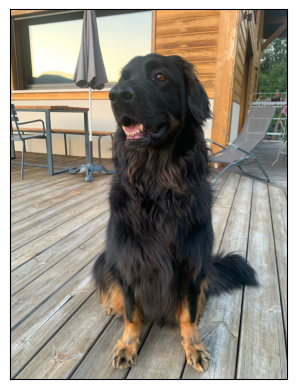

In [12]:
import json
from PIL import Image

# Choose an image to pass through the model
test_image = "dog_but_cooler.png"

# Configure matplotlib for pretty inline plots
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

# Prepare the labels
with open("imagenet-simple-labels.json") as f:
    labels = json.load(f)

# First prepare the transformations: resize the image to what the model was trained on and convert it to a tensor
data_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
# Load the image

image = Image.open(test_image)
plt.imshow(image), plt.xticks([]), plt.yticks([])

# Now apply the transformation, expand the batch dimension, and send the image to the GPU
# image = data_transform(image).unsqueeze(0).cuda()
image = data_transform(image).unsqueeze(0)

# Download the model if it's not there already. It will take a bit on the first run, after that it's fast
model = models.resnet50(pretrained=True)
# Send the model to the GPU
# model.cuda()
# Set layers such as dropout and batchnorm in evaluation mode
model.eval()

# Get the 1000-dimensional model output
out = model(image)
# Find the predicted class
print("Predicted class is: {}".format(labels[out.argmax()]))

Experiments:

Study the code and the results obtained. Possibly add other images downloaded from the internet.

What is the size of the model? Quantize it and then check if the model is still able to correctly classify the other images.

Experiment with other pre-trained CNN models.

    


In [13]:
print_size_of_model(model, "ResNet")

model:  ResNet  	 Size (KB): 102523.238


102523238

Le modèle de ResNet fait un peu plus de 0.1 Go

In [21]:
import torch.quantization


quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)
print_size_of_model(quantized_model, "smoll_resnet")

model:  smoll_resnet  	 Size (KB): 96379.996


96379996

In [23]:
(102523.238 - 96379.996)/102523.238 *100

5.992048358831584

Le processus de quantization permet une réduction de la taille du modèle de 6%

Predicted class is: Flat-Coated Retriever


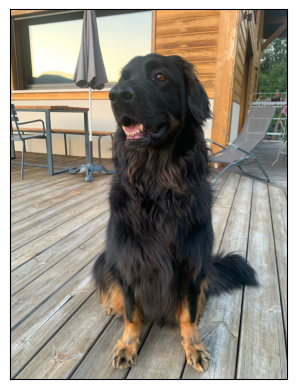

In [14]:
import json
from PIL import Image

# Choose an image to pass through the model
test_image = "dog_but_cooler.png"

# Configure matplotlib for pretty inline plots
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

# Prepare the labels
with open("imagenet-simple-labels.json") as f:
    labels = json.load(f)

# First prepare the transformations: resize the image to what the model was trained on and convert it to a tensor
data_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
# Load the image

image = Image.open(test_image)
plt.imshow(image), plt.xticks([]), plt.yticks([])

# Now apply the transformation, expand the batch dimension, and send the image to the GPU
# image = data_transform(image).unsqueeze(0).cuda()
image = data_transform(image).unsqueeze(0)

# Download the model if it's not there already. It will take a bit on the first run, after that it's fast
model = quantized_model
# Send the model to the GPU
# model.cuda()
# Set layers such as dropout and batchnorm in evaluation mode
model.eval()

# Get the 1000-dimensional model output
out = model(image)
# Find the predicted class
print("Predicted class is: {}".format(labels[out.argmax()]))

Le modèle quantized parvient à prédire la même classe que le modèle initial pour la même image

Essayons le modèle Squeeze net de Pytorch

C:\Users\arman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\arman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to C:\Users\arman/.cache\torch\hub\checkpoints\squeezenet1_0-b66bff10.pth
100.0%


Predicted class is: Tibetan Mastiff


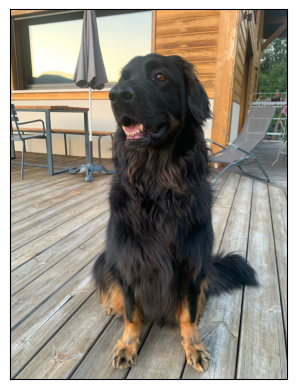

In [24]:
import json
from PIL import Image

# Choose an image to pass through the model
test_image = "dog_but_cooler.png"

# Configure matplotlib for pretty inline plots
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

# Prepare the labels
with open("imagenet-simple-labels.json") as f:
    labels = json.load(f)

# First prepare the transformations: resize the image to what the model was trained on and convert it to a tensor
data_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
# Load the image

image = Image.open(test_image)
plt.imshow(image), plt.xticks([]), plt.yticks([])

# Now apply the transformation, expand the batch dimension, and send the image to the GPU
# image = data_transform(image).unsqueeze(0).cuda()
image = data_transform(image).unsqueeze(0)

# Download the model if it's not there already. It will take a bit on the first run, after that it's fast
model = models.squeezenet1_0(pretrained=True)
# Send the model to the GPU
# model.cuda()
# Set layers such as dropout and batchnorm in evaluation mode
model.eval()

# Get the 1000-dimensional model output
out = model(image)
# Find the predicted class
print("Predicted class is: {}".format(labels[out.argmax()]))

In [25]:
print_size_of_model(model, "SqueezeNet")

model:  SqueezeNet  	 Size (KB): 5009.234


5009234

In [26]:
quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)
print_size_of_model(quantized_model, "smoll_squeezenet")

model:  smoll_squeezenet  	 Size (KB): 5009.234


5009234

Essayer de réduire la taille du modèle squeeze ne conduit à aucun changement, car celui-ci est déjà réduit

## Exercise 4: Transfer Learning
    
    
For this work, we will use a pre-trained model (ResNet18) as a descriptor extractor and will refine the classification by training only the last fully connected layer of the network. Thus, the output layer of the pre-trained network will be replaced by a layer adapted to the new classes to be recognized which will be in our case ants and bees.
Download and unzip in your working directory the dataset available at the address :
    
https://download.pytorch.org/tutorial/hymenoptera_data.zip
    
Execute the following code in order to display some images of the dataset.

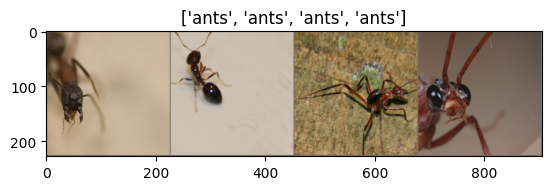

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "hymenoptera_data"
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=0
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders["train"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])



Now, execute the following code which uses a pre-trained model ResNet18 having replaced the output layer for the ants/bees classification and performs the model training by only changing the weights of this output layer.

In [2]:
import copy
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim import lr_scheduler
from torchvision import datasets, transforms

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "hymenoptera_data"
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=4
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


# Get a batch of training data
# inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
# out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[class_names[x] for x in classes])
# training


def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    epoch_time = []  # we'll keep track of the time needed for each epoch

    for epoch in range(num_epochs):
        epoch_start = time.time()
        print("Epoch {}/{}".format(epoch + 1, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in training phase
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        # Add the epoch time
        t_epoch = time.time() - epoch_start
        epoch_time.append(t_epoch)
        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_time


# Download a pre-trained ResNet18 model and freeze its weights
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
# Send the model to the GPU
model = model.to(device)
# Set the loss function
criterion = nn.CrossEntropyLoss()

# Observe that only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
model, epoch_time = train_model(
    model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10
)


C:\Users\arman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\arman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\arman/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%
C:\Users\arman\AppData\Local\P

Epoch 1/10
----------
train Loss: 0.5355 Acc: 0.6844
val Loss: 0.1978 Acc: 0.9477

Epoch 2/10
----------
train Loss: 0.4346 Acc: 0.7828
val Loss: 0.1863 Acc: 0.9412

Epoch 3/10
----------
train Loss: 0.4293 Acc: 0.8156
val Loss: 0.2005 Acc: 0.9346

Epoch 4/10
----------
train Loss: 0.6259 Acc: 0.7582
val Loss: 0.1737 Acc: 0.9542

Epoch 5/10
----------
train Loss: 0.4020 Acc: 0.8484
val Loss: 0.1675 Acc: 0.9608

Epoch 6/10
----------
train Loss: 0.4039 Acc: 0.7992
val Loss: 0.2221 Acc: 0.9281

Epoch 7/10
----------
train Loss: 0.3572 Acc: 0.8402
val Loss: 0.1849 Acc: 0.9412

Epoch 8/10
----------
train Loss: 0.3337 Acc: 0.8566
val Loss: 0.1993 Acc: 0.9281

Epoch 9/10
----------
train Loss: 0.4132 Acc: 0.7951
val Loss: 0.1854 Acc: 0.9346

Epoch 10/10
----------
train Loss: 0.3774 Acc: 0.8115
val Loss: 0.2011 Acc: 0.9281

Training complete in 2m 19s
Best val Acc: 0.960784


Experiments:
Study the code and the results obtained.

Modify the code and add an "eval_model" function to allow
the evaluation of the model on a test set (different from the learning and validation sets used during the learning phase). Study the results obtained.

Now modify the code to replace the current classification layer with a set of two layers using a "relu" activation function for the middle layer, and the "dropout" mechanism for both layers. Renew the experiments and study the results obtained.

Apply ther quantization (post and quantization aware) and evaluate impact on model size and accuracy.

## Optional
    
Try this at home!! 


Pytorch offers a framework to export a given CNN to your selfphone (either android or iOS). Have a look at the tutorial https://pytorch.org/mobile/home/

The Exercise consists in deploying the CNN of Exercise 4 in your phone and then test it on live.



## Author

Alberto BOSIO - Ph. D.